# Build a product based on ML

 Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad.

![Real estate study.JPG](attachment:real_estate_advertising_1145223424.JPG)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from IPython import display
#display.Image("./Users/yuliyahilevich/Downloads/image.png")

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys  
sys.path.insert(0, 'C:/Users/Florina/Desktop/allwomen/DS_2021/functions')

from Functions_EDA import *
from fx_MLClassification import *

In [3]:
df = pd.read_csv('../datasets/P2_dataset.csv')

##  Exploratory Data Analysis and Data cleaning

### Know the data

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [8]:
def cols_unique_vals(df):
    print('List of categarical variables:')
    print(df.select_dtypes(include=['object']).columns)
    print('.~.-'*20)
    print('List of numerical variables:')
    print(df.select_dtypes(include=['int64','float64']).columns)
    print('.~.-'*20)
    print()
    for col in df:
        if df[col].nunique() <= 50:
            if df[col].dtypes == 'object':
                print()
                print(f'{col} - categorical variable ')
                print(f'unique values: {df[col].nunique()}')
                print()
                print(df[col].unique())
                print('-'*20)
            else:
                print()
                print(f'{col} - numerical variable ')
                print(f'unique values: {df[col].nunique()}')
                print()
                print(df[col].unique())
                print('-'*20)

In [9]:
cols_unique_vals(df)

List of categarical variables:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-.~.-
List of numerical variables:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'

In [10]:
df[df['PoolQC'] == 'NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Clean the data

#### Dropping features

In [11]:
# Without futher analysis we decided to drop the columns 'Id', 'MiscFeature','MiscVal' 
df.drop(['MiscFeature','MiscVal'], axis='columns', inplace=True)

In [12]:
df.shape

(1460, 79)

In [13]:
num_var = df.select_dtypes(include=['int64','float64'])

In [14]:
cat_var = df.select_dtypes(include=['object'])


#### Dropping features

##### with high number of missing values

In [15]:
print(f'The total number of missing values in the data set is: {df.isnull().sum().sum()}')

The total number of missing values in the data set is: 5559


In [16]:
#df.replace('None', np.nan, inplace=True)

In [17]:
df.replace('nan', np.nan, inplace=True)

In [18]:
print(f'The total number of missing values in the data set is: {df.isnull().sum().sum()}')

The total number of missing values in the data set is: 5559


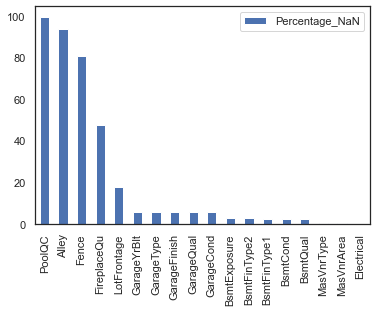

In [19]:
missing = percentage_nullValues(df)
missing[missing.Percentage_NaN > 0].plot.bar();

In [20]:
df = select_threshold(df, 17)

Columns to keep: 74
Those columns have a percentage of NaN less than 17 :

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'Electrical', 'KitchenAbvGr', 'Functional', 'KitchenQual', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'BsmtFullBath', 'Id', 'Fireplaces', 'LowQualFinSF', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GrLivArea', 'Heating', '2ndFlrSF', 'LandSlope', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LotConfig', '1stFlrSF', 'Utilities', 'LandContour', 'LotShape', 'Street', 'LotArea', 'MSZoning', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtF

In [21]:
df_1 = df.copy()
df.drop(['Id'], axis='columns', inplace=True)

##### with more than 10 variables

In [22]:
def cols_delete(df, threshold):
    '''Drop categorical variable that have more that threshhold number of variables'''
    cols_dropped = []
    for index in range(len(df.columns)):
        #print(index)
        #print(df.columns[index])
        #print('unique values', df[df.columns[index]].nunique())
        if df[df.columns[index]].dtypes == 'object' and df[df.columns[index]].nunique()>= threshold :
            cols_dropped.append(df.columns[index])
            
    df_c = df.drop(cols_dropped, axis = 1)
    print(f' We dropped {len(cols_dropped)} variables out of {df.shape[1]}')
    return df_c

In [23]:
df = cols_delete(df, 10)
df.shape

 We dropped 3 variables out of 73


(1460, 70)

 #### Filling missing values

In [24]:
fill_na(df)

Number of missing values on your dataset are

GarageYrBlt     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
               ..
TotalBsmtSF     0
MSSubClass      0
HeatingQC       0
CentralAir      0
SalePrice       0
Length: 70, dtype: int64


,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,...,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,HeatingQC,CentralAir,SalePrice
0,2003.0,Attchd,RFn,TA,TA,No,Unf,GLQ,TA,Gd,...,TA,PConc,706,0,150,856,60,Ex,Y,208500
1,1976.0,Attchd,RFn,TA,TA,Gd,Unf,ALQ,TA,Gd,...,TA,CBlock,978,0,284,1262,20,Ex,Y,181500
2,2001.0,Attchd,RFn,TA,TA,Mn,Unf,GLQ,TA,Gd,...,TA,PConc,486,0,434,920,60,Ex,Y,223500
3,1998.0,Detchd,Unf,TA,TA,No,Unf,ALQ,Gd,TA,...,TA,BrkTil,216,0,540,756,70,Gd,Y,140000
4,2000.0,Attchd,RFn,TA,TA,Av,Unf,GLQ,TA,Gd,...,TA,PConc,655,0,490,1145,60,Ex,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999.0,Attchd,RFn,TA,TA,No,Unf,Unf,TA,Gd,...,TA,PConc,0,0,953,953,60,Ex,Y,175000
1456,1978.0,Attchd,Unf,TA,TA,No,Rec,ALQ,TA,Gd,...,TA,CBlock,790,163,589,1542,20,TA,Y,210000
1457,1941.0,Attchd,RFn,TA,TA,No,Unf,GLQ,Gd,TA,...,Gd,Stone,275,0,877,1152,70,Ex,Y,266500
1458,1950.0,Attchd,Unf,TA,TA,Mn,Rec,GLQ,TA,TA,...,TA,CBlock,49,1029,0,1078,20,Gd,Y,142125


In [25]:
fill_na(df_1)

Number of missing values on your dataset are

GarageYrBlt     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
               ..
TotalBsmtSF     0
MSSubClass      0
HeatingQC       0
CentralAir      0
SalePrice       0
Length: 74, dtype: int64


,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,...,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,HeatingQC,CentralAir,SalePrice
0,2003.0,Attchd,RFn,TA,TA,No,Unf,GLQ,TA,Gd,...,TA,PConc,706,0,150,856,60,Ex,Y,208500
1,1976.0,Attchd,RFn,TA,TA,Gd,Unf,ALQ,TA,Gd,...,TA,CBlock,978,0,284,1262,20,Ex,Y,181500
2,2001.0,Attchd,RFn,TA,TA,Mn,Unf,GLQ,TA,Gd,...,TA,PConc,486,0,434,920,60,Ex,Y,223500
3,1998.0,Detchd,Unf,TA,TA,No,Unf,ALQ,Gd,TA,...,TA,BrkTil,216,0,540,756,70,Gd,Y,140000
4,2000.0,Attchd,RFn,TA,TA,Av,Unf,GLQ,TA,Gd,...,TA,PConc,655,0,490,1145,60,Ex,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999.0,Attchd,RFn,TA,TA,No,Unf,Unf,TA,Gd,...,TA,PConc,0,0,953,953,60,Ex,Y,175000
1456,1978.0,Attchd,Unf,TA,TA,No,Rec,ALQ,TA,Gd,...,TA,CBlock,790,163,589,1542,20,TA,Y,210000
1457,1941.0,Attchd,RFn,TA,TA,No,Unf,GLQ,Gd,TA,...,Gd,Stone,275,0,877,1152,70,Ex,Y,266500
1458,1950.0,Attchd,Unf,TA,TA,Mn,Rec,GLQ,TA,TA,...,TA,CBlock,49,1029,0,1078,20,Gd,Y,142125


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.duplicated().sum()

0

### Descriptive Statistics

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GarageYrBlt,1460.0,1978.506164,23.994583,1900.0,1962.00,1978.506164,2001.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.00,1.000000,1.00,3.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.000000,3.00,8.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.00,0.000000,1.00,2.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.000000,2.00,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.00,0.000000,0.00,2.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.000000,7.00,14.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.000000,1.00,3.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.00,1.000000,1.00,3.0


In [29]:
cat_var.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### Outliers

#### Checking outliers

In [30]:
#for col in df.columns:
#    OutLiersBox(df,col)

#### Treating Outliers

In [31]:
outliers_list = ['GrLivArea', 'MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '2ndFlrSF', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
'SalePrice']

In [32]:
df_clean = outlier_treatment(df,'SalePrice')
OutLiersBox(df_clean,'SalePrice')

Shape of the raw data: (1460, 70)
..................
Shape of the cleaned data: (1399, 70)


In [33]:
df_clean = outlier_treatment(df_clean,'GrLivArea')
OutLiersBox(df_clean,'GrLivArea')

Shape of the raw data: (1399, 70)
..................
Shape of the cleaned data: (1378, 70)


In [34]:
df_clean = outlier_treatment(df_clean,'MasVnrArea')
OutLiersBox(df_clean,'MasVnrArea')

Shape of the raw data: (1378, 70)
..................
Shape of the cleaned data: (1282, 70)


In [35]:
df_clean = outlier_treatment(df_clean,'WoodDeckSF')
OutLiersBox(df_clean,'WoodDeckSF')

Shape of the raw data: (1282, 70)
..................
Shape of the cleaned data: (1252, 70)


In [36]:
df_clean = outlier_treatment(df_clean,'OpenPorchSF')
OutLiersBox(df_clean,'OpenPorchSF')

Shape of the raw data: (1252, 70)
..................
Shape of the cleaned data: (1163, 70)


In [37]:
df_clean = outlier_treatment(df_clean,'2ndFlrSF')
OutLiersBox(df_clean,'2ndFlrSF')

Shape of the raw data: (1163, 70)
..................
Shape of the cleaned data: (1163, 70)


In [38]:
df_clean = outlier_treatment(df_clean,'BsmtFinSF1')
OutLiersBox(df_clean,'BsmtFinSF1')

Shape of the raw data: (1163, 70)
..................
Shape of the cleaned data: (1163, 70)


In [39]:
df_clean = outlier_treatment(df_clean,'BsmtUnfSF')
OutLiersBox(df_clean,'BsmtUnfSF')

Shape of the raw data: (1163, 70)
..................
Shape of the cleaned data: (1152, 70)


In [40]:
df_clean = outlier_treatment(df,'BsmtUnfSF')
OutLiersBox(df_clean,'BsmtUnfSF')

Shape of the raw data: (1460, 70)
..................
Shape of the cleaned data: (1431, 70)


In [41]:
df_clean = outlier_treatment(df_clean,'TotalBsmtSF')
OutLiersBox(df_clean,'TotalBsmtSF')

Shape of the raw data: (1431, 70)
..................
Shape of the cleaned data: (1368, 70)


In [42]:
df_clean = outlier_treatment(df_clean,'1stFlrSF')
OutLiersBox(df_clean,'1stFlrSF')

Shape of the raw data: (1368, 70)
..................
Shape of the cleaned data: (1359, 70)


In [43]:
df_clean.shape

(1359, 70)

In [44]:
drop_rows_perc = (df.shape[0]-df_clean.shape[0])/df.shape[0]*100

print('Shape of the raw dataset:', df.shape[0])
print('\nShape of the CLEAN dataset:', df_clean.shape[0])

print('\nWe lost', df.shape[0]-df_clean.shape[0], 'entries and we dropped',round(drop_rows_perc, 4), '% of the data')

Shape of the raw dataset: 1460

Shape of the CLEAN dataset: 1359

We lost 101 entries and we dropped 6.9178 % of the data


### Correlation Matrix

In [45]:
cat_var_c = df_clean.select_dtypes(include=['object'])
num_var_c = df_clean.select_dtypes(include=['int64','float64'])

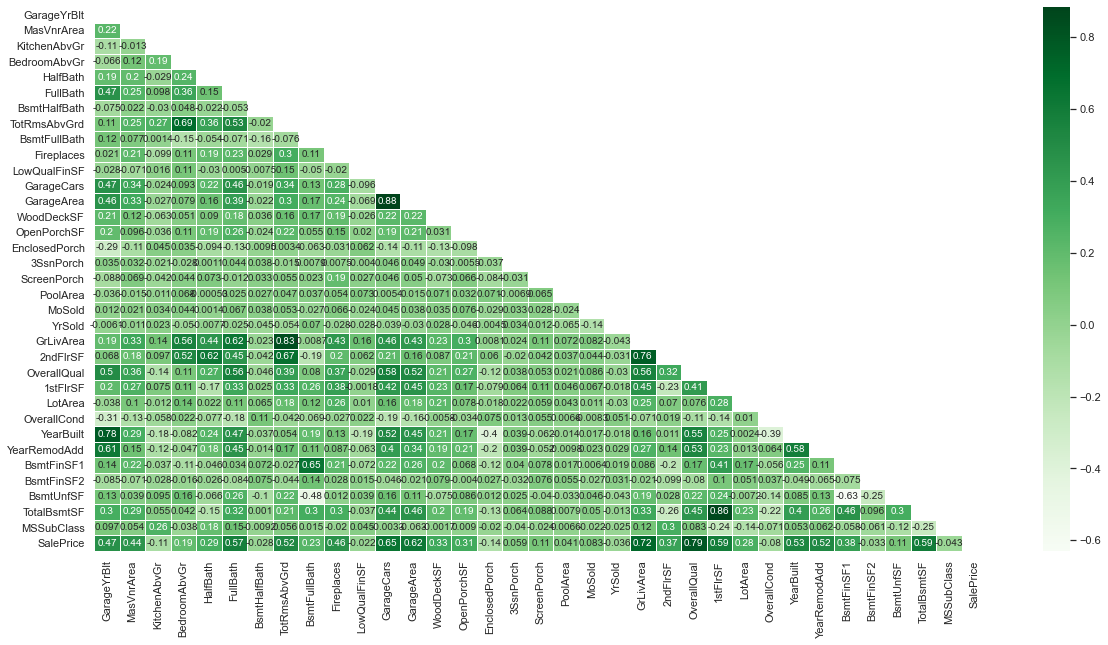

In [46]:
# Correlation Map
corr = df_clean.corr()
f, ax = plt.subplots(figsize=(20, 10))
#sns.heatmap(data=corr, square=True , annot=True, cbar=True);

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=.75, cmap ="Greens")
plt.show()


#sns.heatmap(corr, vmax=.8, square=True);

# Visual exploration

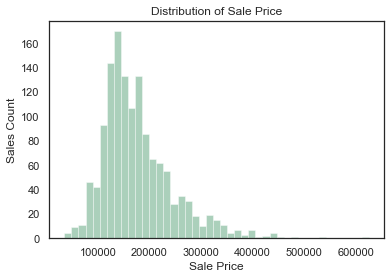

In [47]:
sns.distplot(df_clean['SalePrice'], color="seagreen", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Sales Count")
plt.xlabel("Sale Price");

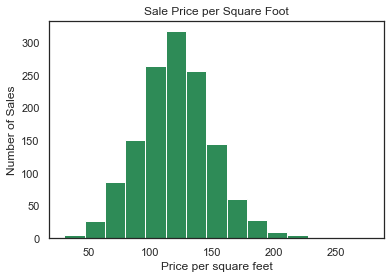

In [48]:
df_clean['SalePriceSF'] = df_clean['SalePrice']/df_clean['GrLivArea']
plt.hist(df_clean['SalePriceSF'], bins=15,color="seagreen")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

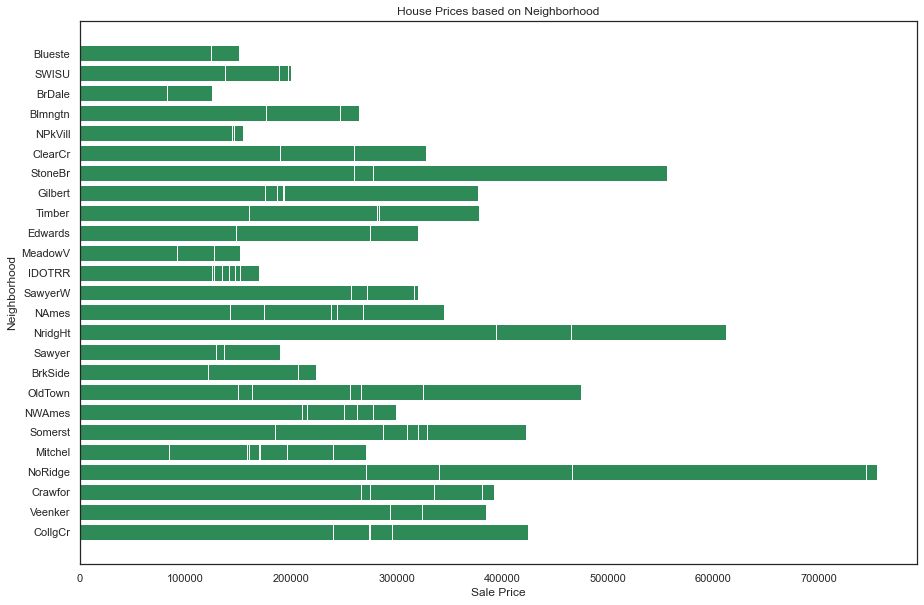

In [49]:
plt.figure(figsize=(15,10))
plt.barh(df_1["Neighborhood"],width=df_1["SalePrice"],color="seagreen")
plt.title("House Prices based on Neighborhood")
plt.ylabel("Neighborhood")
plt.xlabel("Sale Price");

In [50]:
pivot1 = df_1.pivot_table(index ='Neighborhood', values ='Id',
                       aggfunc = pd.Series.nunique).sort_values(by=['Id'], ascending=[True])
# sorting values in descendent order by count of Nationalities

pivot2 = df_1.pivot_table(index ='Neighborhood', values ='SalePrice',
                       aggfunc = 'sum').sort_values(by=['Neighborhood'], ascending=[True])

pivot1 = pd.DataFrame(pivot1.to_records())
pivot2 = pd.DataFrame(pivot2.to_records())
pivot1['SalePrice'] = pivot2['SalePrice']
pivot1 = pivot1.sort_values(by=['SalePrice'], ascending=[False])
pivot1

,Neighborhood,Id,SalePrice
12,Mitchel,49,32815593
5,Blmngtn,17,29694866
16,NWAmes,73,24352838
21,Edwards,100,19382666
8,ClearCr,28,15235506
17,Sawyer,74,14489459
14,BrkSide,58,13800655
15,SawyerW,59,13747108
7,SWISU,25,12821970
20,Somerst,86,11006792


In [51]:
import plotly.express as px
df_1["YrSold"] = df_1["YrSold"].astype(str)
fig = px.scatter(df_1, x="Neighborhood", y="SalePrice",
           size="OverallQual", title='Yearly Sales by Neighborhood and OverallQual',color="YrSold")
fig.show()

In [52]:
import plotly.express as px
df_1["YrSold"] = df_1["YrSold"].astype(str)
fig = px.scatter(df_1, x="Neighborhood", y="SalePrice",
           size="OverallCond", title='Yearly Sales by Neighborhood and OverallCond',color="YrSold")
fig.show()

In [53]:
pivot3 = df_clean.pivot_table(index ='MoSold', values ='SalePrice',
                       aggfunc = 'sum')
pivot3 = pd.DataFrame(pivot3.to_records())
# Plot 
fig = px.line(pivot3, x='MoSold', y='SalePrice', title='Overall Total Sales displayed monthly' )
fig.show()

In [54]:
df_yms = df_clean.groupby(by=['MoSold','YrSold']).agg({"SalePrice" : "sum"})
df_yms_sort = df_yms.sort_values(by=['YrSold',"MoSold"], ascending=[True, True])
df_yms_sort = pd.DataFrame(df_yms_sort.to_records())
df_yms_sort
#Plot
fig = px.line(df_yms_sort, x="MoSold", y="SalePrice", color='YrSold', title='Yearly Sales displayed monthly')
fig.show()

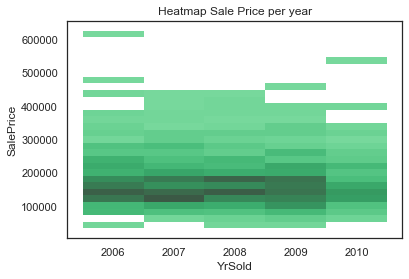

In [55]:
#Heatmap pt Sale Price per year

sns.histplot(
    df_clean, x="YrSold", y="SalePrice",
    bins=30, discrete=(True, False), log_scale=(False, False),color='seagreen'
    ).set(title='Heatmap Sale Price per year');

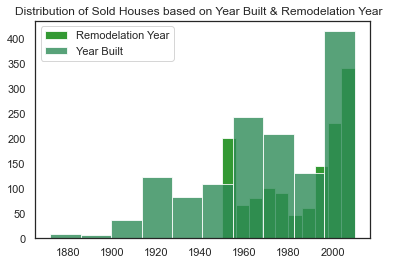

In [56]:
plt.hist(df_clean['YearRemodAdd'], 
         alpha=0.8,
         label='Remodelation Year', color='green' )
  
plt.hist(df_clean['YearBuilt'],
         alpha=0.8,
         label='Year Built', color='seagreen')
  
plt.legend(loc='upper left')
plt.title('Distribution of Sold Houses based on Year Built & Remodelation Year  ')
plt.show()

In [57]:
'''#plotting correlations
num_var=df_clean.columns[df_clean.dtypes!=object]
num_var=num_var[1:-1] 
labels = []
values = []
for col in num_var:
    labels.append(col)
    values.append(np.corrcoef(df_clean[col].values, df_clean.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='seagreen')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price"); '''

'#plotting correlations\nnum_var=df_clean.columns[df_clean.dtypes!=object]\nnum_var=num_var[1:-1] \nlabels = []\nvalues = []\nfor col in num_var:\n    labels.append(col)\n    values.append(np.corrcoef(df_clean[col].values, df_clean.SalePrice.values)[0,1])\n    \nind = np.arange(len(labels))\nwidth = 0.9\nfig, ax = plt.subplots(figsize=(12,40))\nrects = ax.barh(ind, np.array(values), color=\'seagreen\')\nax.set_yticks(ind+((width)/2.))\nax.set_yticklabels(labels, rotation=\'horizontal\')\nax.set_xlabel("Correlation coefficient")\nax.set_title("Correlation Coefficients w.r.t Sale Price"); '

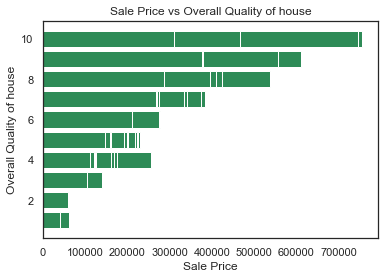

In [58]:
plt.barh(df["OverallQual"],width=df["SalePrice"],color="seagreen")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

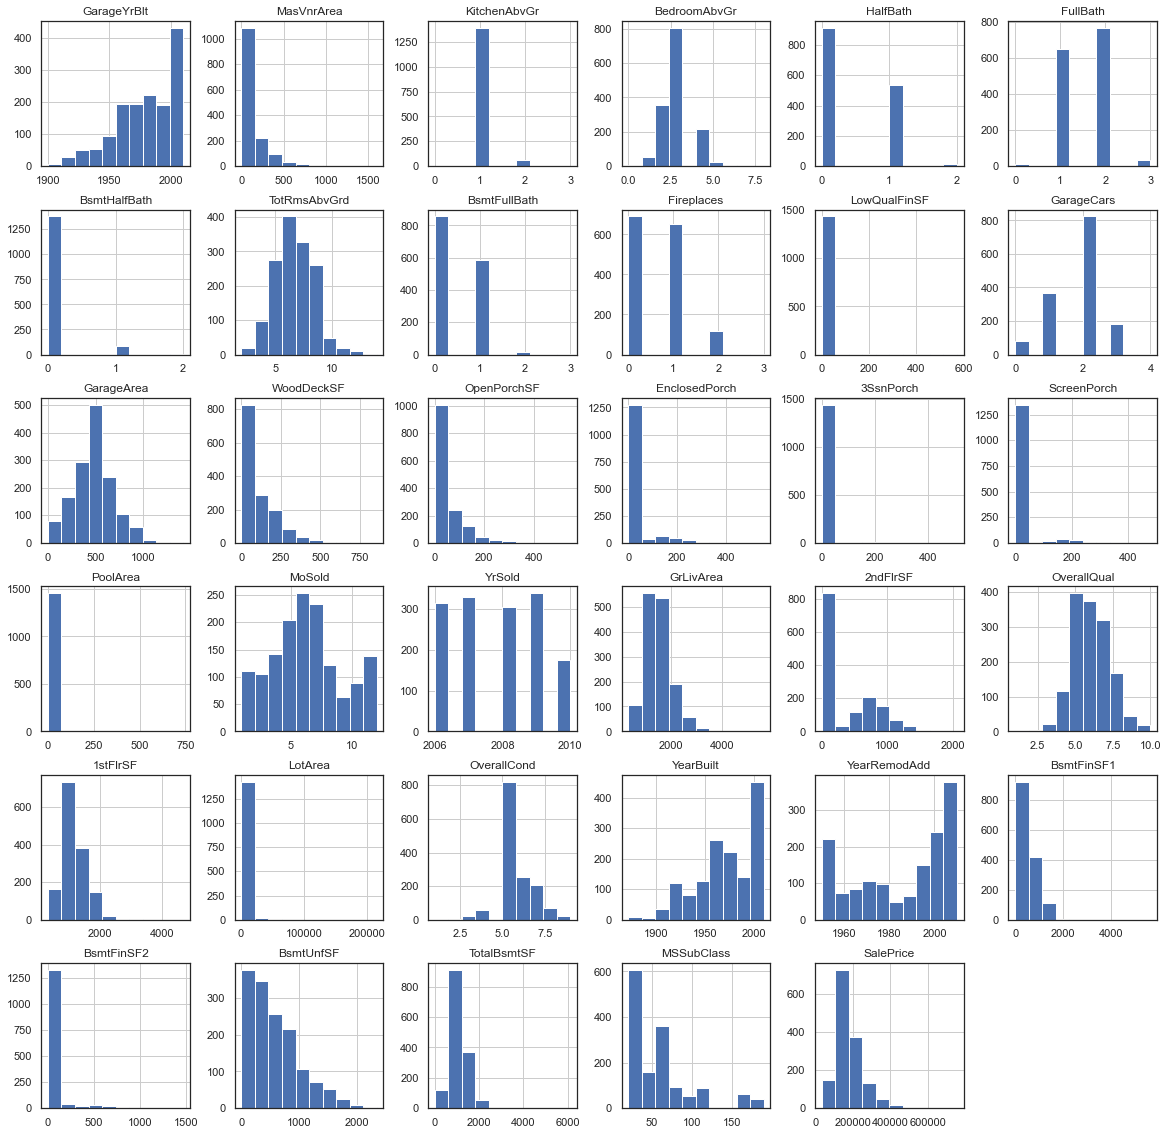

In [59]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='white', figsize=(20, 20));

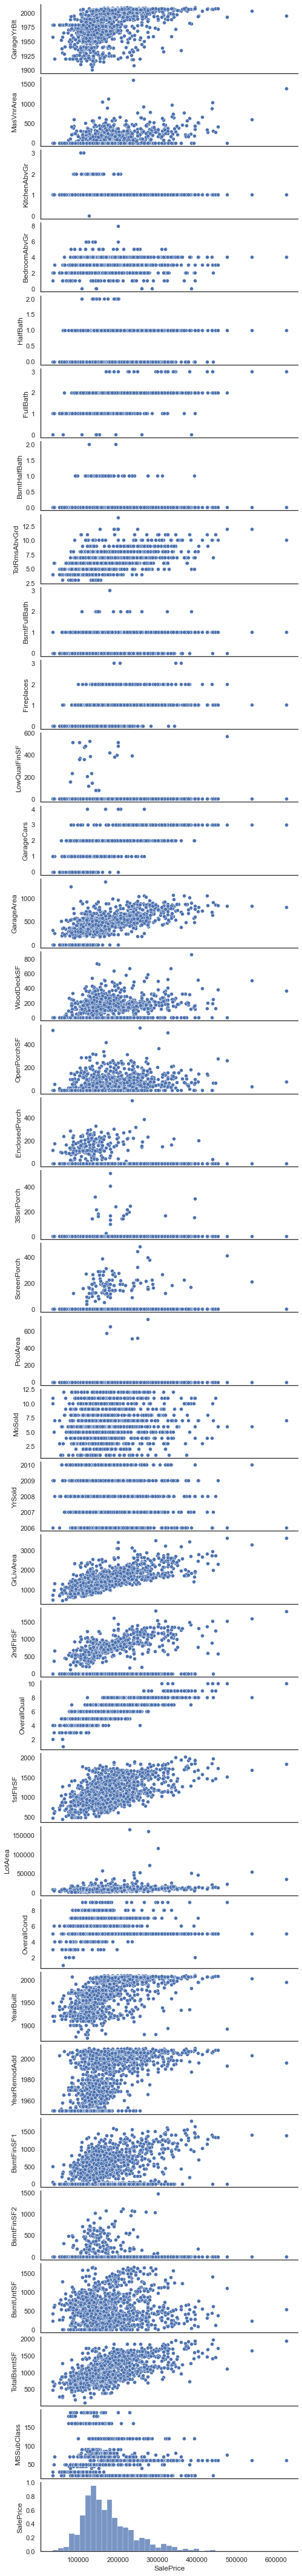

In [60]:
g = sns.pairplot(num_var_c, y_vars= num_var_c.columns.values, x_vars='SalePrice')
g.fig.set_size_inches(10,60)

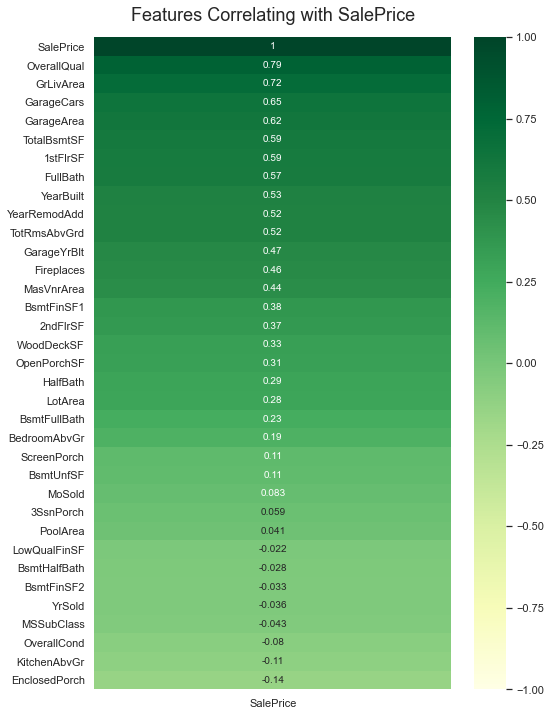

In [61]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(num_var_c.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGn')
heatmap.set_title('Features Correlating with SalePrice', fontdict={'fontsize':18}, pad=16);

# Enconding of Categorical Variables

In [62]:
# Create a bckup
cat_var_c = cat_var_c.copy()

In [63]:
#!pip install category-encoders

In [64]:
import category_encoders as ce

# Step 1. Instantiate the object with the necessary inputs
encoder = ce.OrdinalEncoder(cols=cat_var_c.columns)
encoder

# Step 2. Fit the variable to the instatiated model
df_clean = encoder.fit_transform(df_clean)

In [65]:
df_clean.head()

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,...,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,HeatingQC,CentralAir,SalePrice,SalePriceSF
0,2003.0,1,1,1,1,1,1,1,1,1,...,1,706,0,150,856,60,1,1,208500,121.929825
1,1976.0,1,1,1,1,2,1,2,1,1,...,2,978,0,284,1262,20,1,1,181500,143.819334
2,2001.0,1,1,1,1,3,1,1,1,1,...,1,486,0,434,920,60,1,1,223500,125.139978
3,1998.0,2,2,1,1,1,1,2,2,2,...,3,216,0,540,756,70,2,1,140000,81.537566
4,2000.0,1,1,1,1,4,1,1,1,1,...,1,655,0,490,1145,60,1,1,250000,113.739763


# Scaling the target variable

In [66]:
df_clean['SalePrice_log'] = np.log(df_clean['SalePrice'])
df_clean

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,...,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSSubClass,HeatingQC,CentralAir,SalePrice,SalePriceSF,SalePrice_log
0,2003.0,1,1,1,1,1,1,1,1,1,...,706,0,150,856,60,1,1,208500,121.929825,12.247694
1,1976.0,1,1,1,1,2,1,2,1,1,...,978,0,284,1262,20,1,1,181500,143.819334,12.109011
2,2001.0,1,1,1,1,3,1,1,1,1,...,486,0,434,920,60,1,1,223500,125.139978,12.317167
3,1998.0,2,2,1,1,1,1,2,2,2,...,216,0,540,756,70,2,1,140000,81.537566,11.849398
4,2000.0,1,1,1,1,4,1,1,1,1,...,655,0,490,1145,60,1,1,250000,113.739763,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2004.0,1,1,1,1,1,1,1,1,1,...,410,0,811,1221,20,1,1,185000,151.515152,12.128111
1455,1999.0,1,1,1,1,1,1,3,1,1,...,0,0,953,953,60,1,1,175000,106.253795,12.072541
1457,1941.0,1,1,1,1,1,1,1,2,2,...,275,0,877,1152,70,1,1,266500,113.888889,12.493130
1458,1950.0,1,2,1,1,3,4,1,1,2,...,49,1029,0,1078,20,2,1,142125,131.841373,11.864462


# Feature Importance

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.


 ### Linear Regression Feature Importance

Feature: 0, Score: -0.00058
Feature: 1, Score: -0.00127
Feature: 2, Score: -0.00436
Feature: 3, Score: -0.00930
Feature: 4, Score: 0.00417
Feature: 5, Score: -0.00501
Feature: 6, Score: -0.00233
Feature: 7, Score: 0.00192
Feature: 8, Score: 0.00078
Feature: 9, Score: -0.00925
Feature: 10, Score: -0.00292
Feature: 11, Score: -0.00006
Feature: 12, Score: -0.00254
Feature: 13, Score: -0.01128
Feature: 14, Score: -0.01002
Feature: 15, Score: -0.00786
Feature: 16, Score: 0.01326
Feature: 17, Score: 0.04378
Feature: 18, Score: 0.02857
Feature: 19, Score: 0.01179
Feature: 20, Score: 0.00209
Feature: 21, Score: 0.00907
Feature: 22, Score: 0.01419
Feature: 23, Score: -0.00001
Feature: 24, Score: 0.01188
Feature: 25, Score: 0.00002
Feature: 26, Score: -0.00652
Feature: 27, Score: -0.00001
Feature: 28, Score: -0.00002
Feature: 29, Score: 0.00007
Feature: 30, Score: 0.00008
Feature: 31, Score: 0.00007
Feature: 32, Score: -0.00004
Feature: 33, Score: -0.00068
Feature: 34, Score: -0.00227
Feature: 3

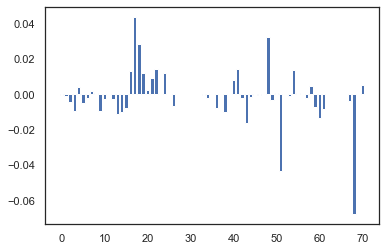

In [67]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
y = df_clean['SalePrice_log']
X = df_clean.drop(['SalePrice_log'],axis=1)

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [68]:
# make importances relative to max importance
importance = 100.0 * (importance / importance.max())

importance

array([-1.31774367e+00, -2.88983932e+00, -9.96407354e+00, -2.12405981e+01,
        9.52997504e+00, -1.14509232e+01, -5.33156932e+00,  4.38942700e+00,
        1.78890013e+00, -2.11193867e+01, -6.67396270e+00, -1.39495908e-01,
       -5.79321890e+00, -2.57633400e+01, -2.28858599e+01, -1.79564755e+01,
        3.02946377e+01,  1.00000000e+02,  6.52465401e+01,  2.69313034e+01,
        4.78043801e+00,  2.07067388e+01,  3.24088817e+01, -2.87855818e-02,
        2.71357209e+01,  5.27096545e-02, -1.48995690e+01, -2.43910943e-02,
       -4.07803686e-02,  1.64193375e-01,  1.80596207e-01,  1.64939273e-01,
       -8.47325134e-02, -1.54974391e+00, -5.17999171e+00,  8.72212025e-01,
       -1.72281380e+01,  5.61805126e-01, -2.33483291e+01,  2.12293402e-01,
        1.82737669e+01,  3.25084391e+01, -5.29930366e+00, -3.69455983e+01,
       -3.52788863e+00, -1.43995160e+00, -5.19582457e-01,  3.78297306e-01,
        7.41328639e+01, -7.33301991e+00,  2.02383942e+00, -9.91537654e+01,
        7.27615150e-04, -

In [69]:
importance_ = pd.DataFrame(importance, index= X.columns, columns = ['Importance']).sort_values('Importance',ascending=False)
importance_[:10]

,Importance
HalfBath,100.000000
Utilities,74.132864
FullBath,65.246540
OverallQual,32.508439
Fireplaces,32.408882
OverallCond,31.259384
BedroomAbvGr,30.294638
GarageCars,27.135721
BsmtHalfBath,26.931303
BsmtFullBath,20.706739


In [70]:
importance_ = pd.DataFrame(importance, index= X.columns, columns = ['Importance']).sort_values('Importance',ascending=False)
importance_.reset_index(inplace=True)
importance_.rename(columns={'index': 'features'}, inplace=True)
features_lr = []
for i in importance_[:10]['features']:
    features_lr.append(i)
features_lr.append('SalePrice_log')
features_lr

['HalfBath',
 'Utilities',
 'FullBath',
 'OverallQual',
 'Fireplaces',
 'OverallCond',
 'BedroomAbvGr',
 'GarageCars',
 'BsmtHalfBath',
 'BsmtFullBath',
 'SalePrice_log']

In [71]:
df_feature_lr = df_clean[features_lr]
df_feature_lr

,HalfBath,Utilities,FullBath,OverallQual,Fireplaces,OverallCond,BedroomAbvGr,GarageCars,BsmtHalfBath,BsmtFullBath,SalePrice_log
0,1,1,2,7,0,5,3,2,0,1,12.247694
1,0,1,2,6,1,8,3,2,1,0,12.109011
2,1,1,2,7,1,5,3,2,0,1,12.317167
3,0,1,1,7,1,5,3,3,0,1,11.849398
4,1,1,2,8,1,5,4,3,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,2,7,0,5,2,2,0,1,12.128111
1455,1,1,2,6,1,5,3,2,0,0,12.072541
1457,0,1,2,7,2,9,4,1,0,0,12.493130
1458,0,1,1,5,0,6,2,1,0,1,11.864462


In [72]:
#df_feature_lr.to_csv('../datasets/P2_lr.csv')

## Decision Tree Feature Importance

### CART Feature Importance on a regression problem 

We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

Feature: 0, Score: -1.31774
Feature: 1, Score: -2.88984
Feature: 2, Score: -9.96407
Feature: 3, Score: -21.24060
Feature: 4, Score: 9.52998
Feature: 5, Score: -11.45092
Feature: 6, Score: -5.33157
Feature: 7, Score: 4.38943
Feature: 8, Score: 1.78890
Feature: 9, Score: -21.11939
Feature: 10, Score: -6.67396
Feature: 11, Score: -0.13950
Feature: 12, Score: -5.79322
Feature: 13, Score: -25.76334
Feature: 14, Score: -22.88586
Feature: 15, Score: -17.95648
Feature: 16, Score: 30.29464
Feature: 17, Score: 100.00000
Feature: 18, Score: 65.24654
Feature: 19, Score: 26.93130
Feature: 20, Score: 4.78044
Feature: 21, Score: 20.70674
Feature: 22, Score: 32.40888
Feature: 23, Score: -0.02879
Feature: 24, Score: 27.13572
Feature: 25, Score: 0.05271
Feature: 26, Score: -14.89957
Feature: 27, Score: -0.02439
Feature: 28, Score: -0.04078
Feature: 29, Score: 0.16419
Feature: 30, Score: 0.18060
Feature: 31, Score: 0.16494
Feature: 32, Score: -0.08473
Feature: 33, Score: -1.54974
Feature: 34, Score: -5.1

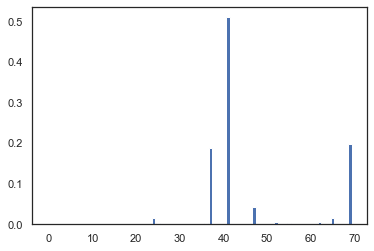

In [73]:
# Decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
y = df_clean['SalePrice_log']
X = df_clean.drop(['SalePrice_log','SalePrice'],axis=1)
# define the model
model = DecisionTreeRegressor(random_state=42)
# fit the model
model.fit(X, y)
# get importance
importance_cart = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_cart))], importance_cart)
pyplot.show()

In [74]:
# make importances relative to max importance
importance_cart = 100.0 * (importance_cart / importance_cart.max())

importance_cart

array([9.75977839e-02, 1.96229914e-01, 1.37116129e-02, 8.99510329e-04,
       7.50907961e-04, 5.77390784e-02, 5.05018078e-03, 6.61340588e-02,
       9.37593446e-03, 1.05800869e-02, 2.17318600e-03, 1.40246670e-01,
       8.38540526e-04, 0.00000000e+00, 5.75711257e-03, 1.62889924e-03,
       3.44301090e-02, 2.65881783e-03, 2.92542057e-02, 2.02083179e-03,
       4.61755093e-02, 2.24211714e-03, 2.97554391e-02, 0.00000000e+00,
       3.24463798e+00, 7.21808382e-01, 2.07752770e-03, 8.09844986e-02,
       4.28739941e-02, 2.15236638e-02, 0.00000000e+00, 2.43548433e-02,
       0.00000000e+00, 1.65945562e-01, 6.42547970e-02, 2.87762646e-03,
       5.86272406e-01, 3.68025750e+01, 1.66747495e-01, 2.57694704e-01,
       5.34467680e-03, 1.00000000e+02, 3.04331703e-03, 1.21418221e-02,
       0.00000000e+00, 9.88447029e-04, 5.02752363e-02, 8.27568010e+00,
       0.00000000e+00, 3.60864796e-03, 2.59341281e-02, 0.00000000e+00,
       9.47666787e-01, 1.05763457e-02, 1.15845944e-02, 4.58919920e-01,
      

In [75]:
importance_cart_ = pd.DataFrame(importance_cart, index= X.columns, columns = ['Importance']).sort_values('Importance',ascending=False)
importance_cart_[:10]

,Importance
OverallQual,100.000000
SalePriceSF,38.807542
GrLivArea,36.802575
1stFlrSF,8.275680
GarageCars,3.244638
TotalBsmtSF,3.063930
BsmtFinSF1,1.048543
LotArea,0.947667
GarageArea,0.721808
SaleCondition,0.586272


In [76]:
importance_cart_.reset_index(inplace=True)
importance_cart_.rename(columns={'index': 'features'}, inplace=True)
features_cart = []
for i in importance_cart_[:10]['features']:
    features_cart.append(i)
features_cart.append('SalePrice_log')


In [77]:
df_feature_cart = df_clean[features_cart]
df_feature_cart

,OverallQual,SalePriceSF,GrLivArea,1stFlrSF,GarageCars,TotalBsmtSF,BsmtFinSF1,LotArea,GarageArea,SaleCondition,SalePrice_log
0,7,121.929825,1710,856,2,856,706,8450,548,1,12.247694
1,6,143.819334,1262,1262,2,1262,978,9600,460,1,12.109011
2,7,125.139978,1786,920,2,920,486,11250,608,1,12.317167
3,7,81.537566,1717,961,3,756,216,9550,642,2,11.849398
4,8,113.739763,2198,1145,3,1145,655,14260,836,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1454,7,151.515152,1221,1221,2,1221,410,7500,400,1,12.128111
1455,6,106.253795,1647,953,2,953,0,7917,460,1,12.072541
1457,7,113.888889,2340,1188,1,1152,275,9042,252,1,12.493130
1458,5,131.841373,1078,1078,1,1078,49,9717,240,1,11.864462


In [78]:
#df_feature_cart.to_csv('../datasets/P2_cart.csv')

### Random Forest Regression Feature Importance

Feature: 0, Score: -1.31774
Feature: 1, Score: -2.88984
Feature: 2, Score: -9.96407
Feature: 3, Score: -21.24060
Feature: 4, Score: 9.52998
Feature: 5, Score: -11.45092
Feature: 6, Score: -5.33157
Feature: 7, Score: 4.38943
Feature: 8, Score: 1.78890
Feature: 9, Score: -21.11939
Feature: 10, Score: -6.67396
Feature: 11, Score: -0.13950
Feature: 12, Score: -5.79322
Feature: 13, Score: -25.76334
Feature: 14, Score: -22.88586
Feature: 15, Score: -17.95648
Feature: 16, Score: 30.29464
Feature: 17, Score: 100.00000
Feature: 18, Score: 65.24654
Feature: 19, Score: 26.93130
Feature: 20, Score: 4.78044
Feature: 21, Score: 20.70674
Feature: 22, Score: 32.40888
Feature: 23, Score: -0.02879
Feature: 24, Score: 27.13572
Feature: 25, Score: 0.05271
Feature: 26, Score: -14.89957
Feature: 27, Score: -0.02439
Feature: 28, Score: -0.04078
Feature: 29, Score: 0.16419
Feature: 30, Score: 0.18060
Feature: 31, Score: 0.16494
Feature: 32, Score: -0.08473
Feature: 33, Score: -1.54974
Feature: 34, Score: -5.1

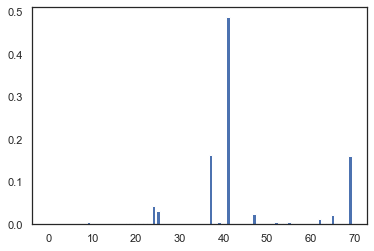

In [79]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
y = df_clean['SalePrice_log']
X = df_clean.drop(['SalePrice_log', 'SalePrice'],axis=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance_rdn = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_rdn))], importance_rdn)
pyplot.show()


In [80]:
# make importances relative to max importance
importance_rdn = 100.0 * (importance_rdn / importance_rdn.max())

importance_rdn

array([2.95628038e-01, 3.12267618e-01, 6.34789348e-02, 1.61031053e-02,
       7.53151232e-03, 8.15272234e-02, 1.98055788e-02, 1.25029551e-01,
       3.72977543e-02, 8.75848554e-01, 7.31971434e-02, 3.16321300e-01,
       2.43331181e-02, 5.69906509e-03, 4.00776170e-02, 1.41253868e-01,
       1.14241510e-01, 4.60361867e-02, 4.55964351e-01, 2.83760269e-02,
       3.90423813e-01, 5.62686273e-02, 3.88171512e-01, 2.45330143e-02,
       8.86850408e+00, 6.49134460e+00, 5.95285491e-02, 2.52087660e-01,
       2.84042941e-01, 8.39690703e-02, 6.99562964e-03, 5.62013614e-02,
       1.62221656e-03, 2.53690071e-01, 1.45975952e-01, 3.77110739e-02,
       1.72905126e-01, 3.36186668e+01, 1.62463081e-02, 9.65139865e-01,
       4.64029363e-02, 1.00000000e+02, 1.17083490e-01, 1.38804973e-02,
       6.19203889e-03, 2.85733064e-02, 7.89980518e-02, 4.96167507e+00,
       8.73230803e-07, 4.33032027e-02, 6.06535619e-02, 4.06671425e-05,
       1.12401768e+00, 3.70503289e-01, 5.61522921e-01, 9.48215476e-01,
      

In [81]:
importance_rdn_ = pd.DataFrame(importance_rdn, index= X.columns, columns = ['Importance']).sort_values('Importance',ascending=False)
importance_rdn_[:10]

,Importance
OverallQual,100.000000
GrLivArea,33.618667
SalePriceSF,32.817914
GarageCars,8.868504
GarageArea,6.491345
1stFlrSF,4.961675
TotalBsmtSF,4.543947
BsmtFinSF1,2.373222
LotArea,1.124018
2ndFlrSF,0.965140


In [82]:
importance_rdn_.reset_index(inplace=True)
importance_rdn_.rename(columns={'index': 'features'}, inplace=True)
features_rdn = []
for i in importance_rdn_[:10]['features']:
    features_rdn.append(i)
features_rdn.append('SalePrice_log')

In [83]:
df_feature_rdn = df_clean[features_rdn]
df_feature_rdn

,OverallQual,GrLivArea,SalePriceSF,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,BsmtFinSF1,LotArea,2ndFlrSF,SalePrice_log
0,7,1710,121.929825,2,548,856,856,706,8450,854,12.247694
1,6,1262,143.819334,2,460,1262,1262,978,9600,0,12.109011
2,7,1786,125.139978,2,608,920,920,486,11250,866,12.317167
3,7,1717,81.537566,3,642,961,756,216,9550,756,11.849398
4,8,2198,113.739763,3,836,1145,1145,655,14260,1053,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1454,7,1221,151.515152,2,400,1221,1221,410,7500,0,12.128111
1455,6,1647,106.253795,2,460,953,953,0,7917,694,12.072541
1457,7,2340,113.888889,1,252,1188,1152,275,9042,1152,12.493130
1458,5,1078,131.841373,1,240,1078,1078,49,9717,0,11.864462


In [84]:
#df_feature_rdn.to_csv('../datasets/P2_rdn.csv')